In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mlgrad.af as af
import mlgrad.funcs as funcs
import mlgrad.utils as utils
import mlgrad.pca as pca
import pandas as pd
import sklearn.datasets as datasets
import sklearn.decomposition as decomposition

In [2]:
df = pd.read_csv("data/HIP_star.csv", sep=',', usecols=['Vmag','B-V'])
df.dropna(inplace=True)
df

,Vmag,B-V
0,9.27,0.999
1,8.65,0.778
2,10.78,1.150
3,10.57,1.030
4,9.93,1.068
...,...,...
2714,8.38,0.651
2715,8.28,0.734
2716,8.16,0.652
2717,7.72,0.563


In [3]:
B_V = df['B-V'].values
Vmag = df['Vmag'].values
X0 = np.c_[Vmag, B_V]

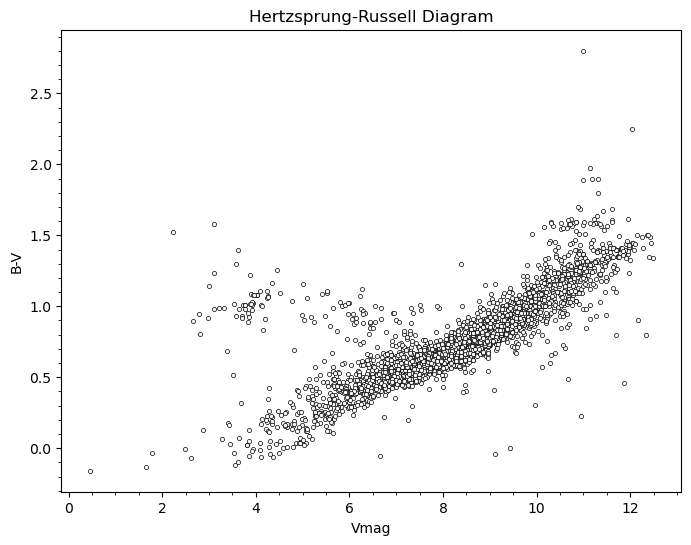

In [4]:
plt.figure(figsize=(8,6))
plt.scatter(Vmag, B_V, s=9, c='w', edgecolors='k', linewidth=0.5)
plt.xlabel('Vmag')
plt.ylabel('B-V')
plt.title('Hertzsprung-Russell Diagram')
plt.minorticks_on()
plt.show()

In [5]:
pca_sk = decomposition.PCA()
pca_sk = pca_sk.fit(X0)

In [6]:
sk_cs = pca_sk.components_
sk_c0 = pca_sk.mean_
sk_a1 = sk_cs[0,:]
sk_a2 = sk_cs[1,:]

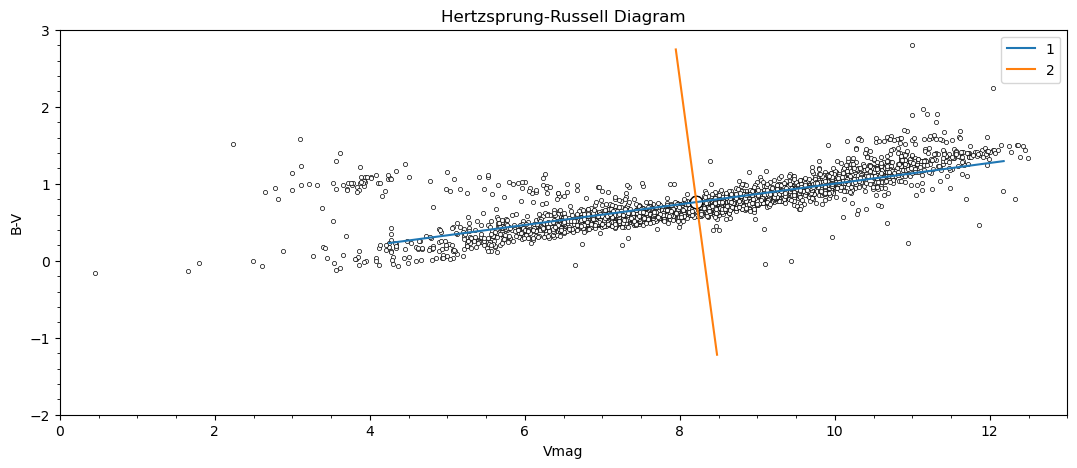

In [7]:
plt.figure(figsize=(13,5))
plt.scatter(Vmag, B_V, s=9, c='w', edgecolors='k', linewidth=0.5)
plt.scatter([sk_c0[0]], [sk_c0[1]], s=81, c='w', edgecolors='k')
plt.plot([sk_c0[0]-4*sk_a1[0], sk_c0[0]+4*sk_a1[0]], [sk_c0[1]-4*sk_a1[1], sk_c0[1]+4*sk_a1[1]], label='1')
plt.plot([sk_c0[0]-2*sk_a2[0], sk_c0[0]+2*sk_a2[0]], [sk_c0[1]-2*sk_a2[1], sk_c0[1]+2*sk_a2[1]], label='2')
plt.xlabel('Vmag')
plt.ylabel('B-V')
plt.title('Hertzsprung-Russell Diagram')
plt.minorticks_on()
plt.xlim(0,13)
plt.ylim(-2,3)
plt.legend()
plt.show()

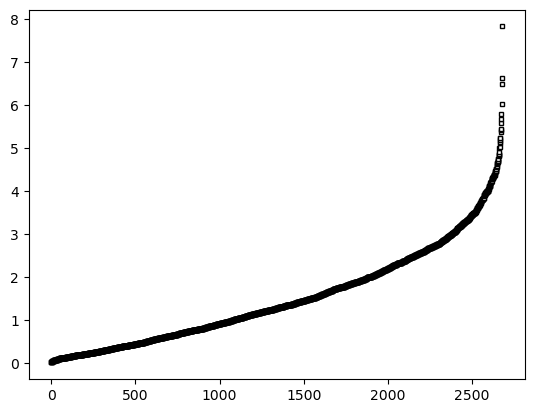

[8.215 0.762]


In [8]:
c0 = pca.location(X0)
plt.plot(sorted(pca.distance_center(X0, c0)), marker='s', markersize=3, color='w', markeredgecolor='k')
plt.show()
print(c0)

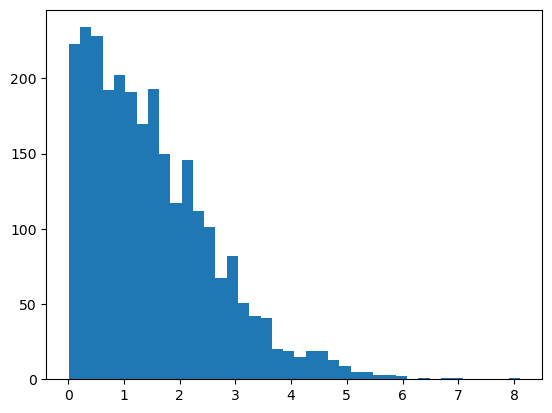

[8.499 0.790]


In [9]:
# N = len(X0)
# alpha = (N - 8) / N
# print(alpha)
wma = af.averaging_function("WM", funcs.SoftAbs_Sqrt(0.001), kwds={"alpha":0.9})
c = pca.robust_location(X0, wma)
plt.hist(pca.distance_center(X0, c), bins=40)
# plt.plot(sorted(pca.distance_center(X0, c)), marker='s', markersize=3)
plt.show()
print(c)

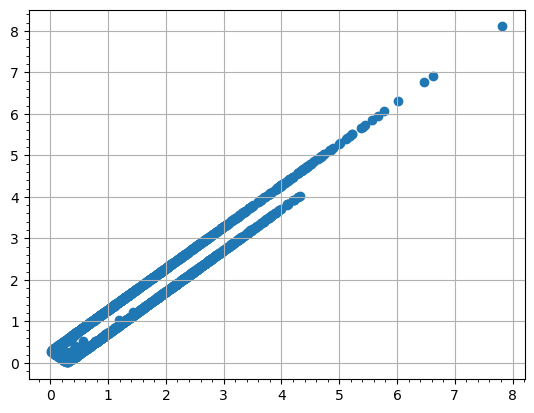

In [10]:
D0 = pca.distance_center(X0, c0)
D1 = pca.distance_center(X0, c)
plt.scatter(D0, D1)
plt.minorticks_on()
plt.grid(1)
plt.show()

/tmp/ipykernel_213198/587308544.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


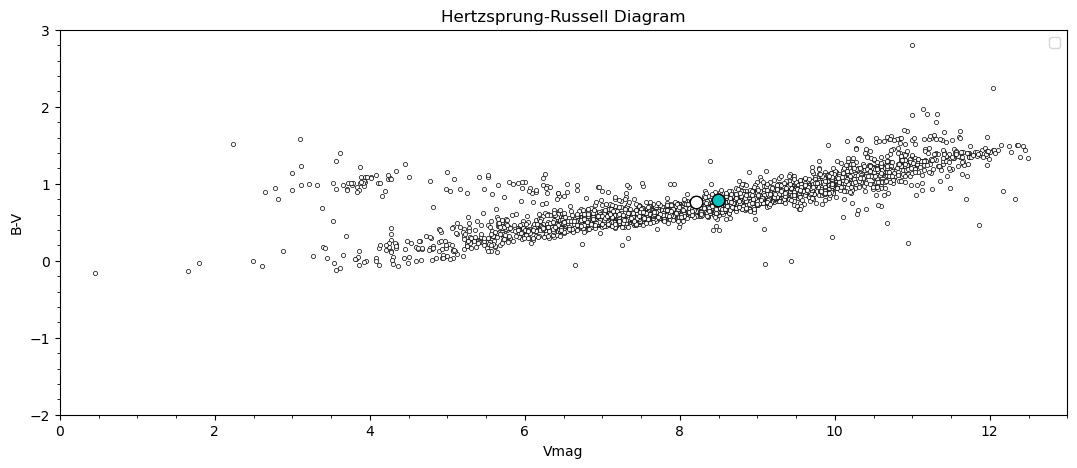

In [11]:
plt.figure(figsize=(13,5))
plt.scatter(Vmag, B_V, s=9, c='w', edgecolors='k', linewidth=0.5)
plt.scatter([sk_c0[0]], [sk_c0[1]], s=81, c='w', edgecolors='k')
plt.scatter([c[0]], c[[1]], s=81, c='c', edgecolors='k')
plt.xlabel('Vmag')
plt.ylabel('B-V')
plt.title('Hertzsprung-Russell Diagram')
plt.minorticks_on()
plt.xlim(0,13)
plt.ylim(-2,3)
plt.legend()
plt.show()

In [12]:
X1 = X0 - c
X1_0 = X0 - c0

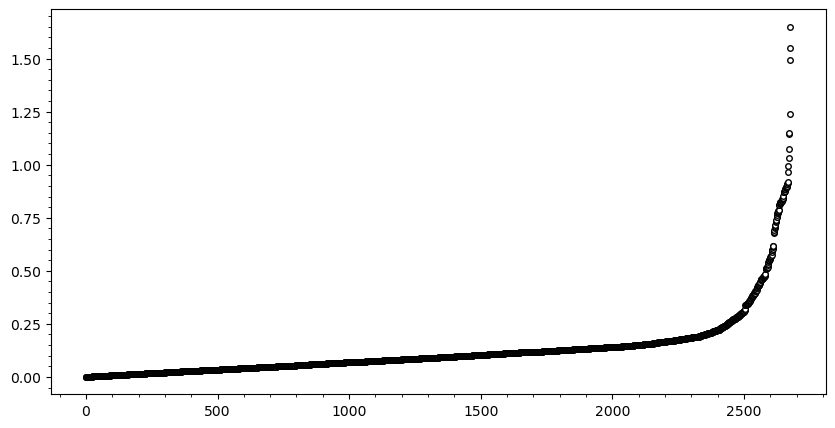

3.5138839265408683 [0.991 0.133]


In [13]:
a1_0, L1_0 = pca.find_pc(X1_0)
plt.figure(figsize=(10,5))
# plt.hist(pca.distance_line(X1_0, a1_0), bins=50, rwidth=0.9)
plt.plot(sorted(pca.distance_line(X1_0, a1_0)), marker='o', markersize=4, color='w', markeredgecolor='k')
plt.minorticks_on()
plt.show()
print(L1_0, a1_0)

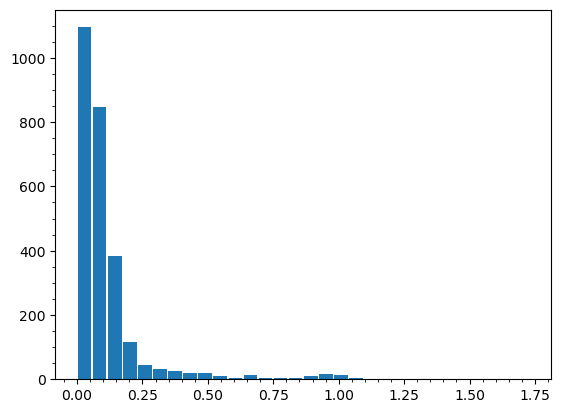

3.156088509934128 [0.987 0.161]


In [14]:
# N = len(X0)
# alpha = (N - 20) / N
# print(alpha)
# wma = af.averaging_function("WM", funcs.QuantileFunc(0.95, funcs.SoftAbs_Sqrt(0.001)))
a1, L1 = pca._find_robust_pc(X1, wma)

plt.hist(pca.distance_line(X1, a1), bins=30, rwidth=0.9)
# plt.plot(sorted(pca.distance_line(X1, a1)), marker='o', markersize=4)
plt.minorticks_on()
plt.show()
print(L1, a1)
U1 = pca.project_line(X1, a1)
U1_0 = pca.project_line(X1_0, a1_0)

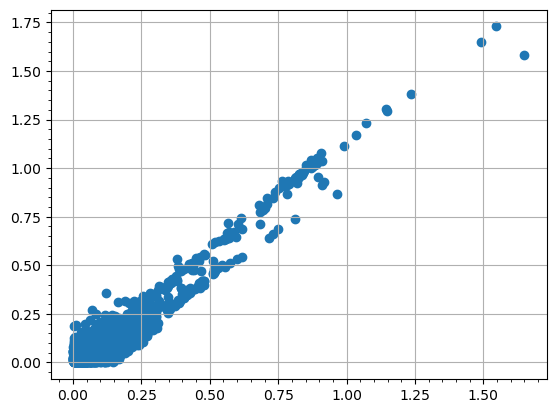

In [15]:
plt.scatter(pca.distance_line(X1_0, a1_0), pca.distance_line(X1, a1))
plt.minorticks_on()
plt.grid(1)
plt.show()

In [16]:
X2 = pca.project(X1, a1)
X2_0 = pca.project(X1_0, a1_0)

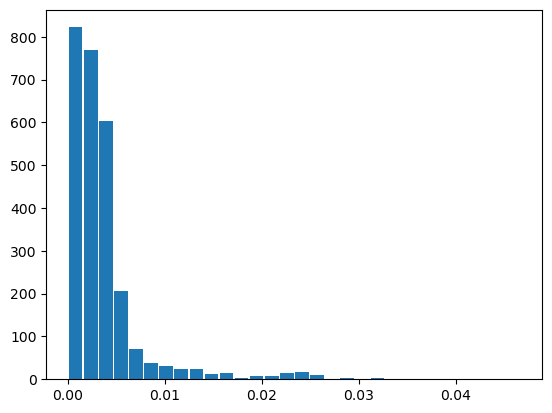

0.04278502078477116 [-0.161  0.987]


In [17]:
a2_0, L2_0 = pca.find_pc(X2)
plt.hist(pca.distance_line(X2_0, a2_0), bins=30, rwidth=0.9)
# plt.plot(sorted(pca.distance_line(X2_0, a2_0)), marker='o', markersize=4)
plt.show()
print(L2_0, a2_0)

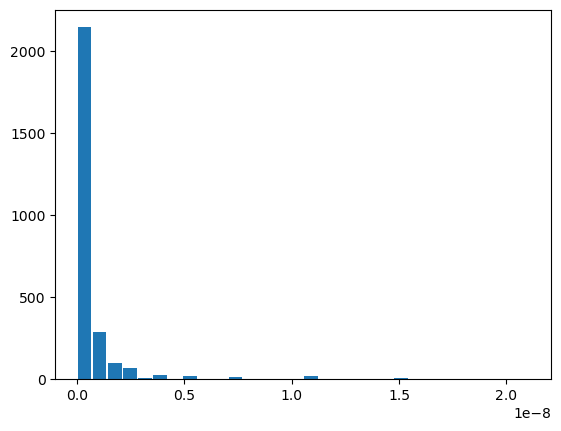

0.041849658960372405 [-0.161  0.987]


In [18]:
# N = len(X0)
# alpha = (N - 10) / N
# print(alpha)
# wma = af.averaging_function("WM", funcs.QuantileFunc(0.95, funcs.SoftAbs_Sqrt(0.001)))
a2, L2 = pca._find_robust_pc(X2, wma)
plt.hist(pca.distance_line(X2, a2), bins=30, rwidth=0.9)
# plt.plot(sorted(pca.distance_line(X2, a2)), marker='o', markersize=3)
plt.show()
print(L2, a2)
U2 = pca.project_line(X2, a2)
U2_0 = pca.project_line(X2_0, a2_0)

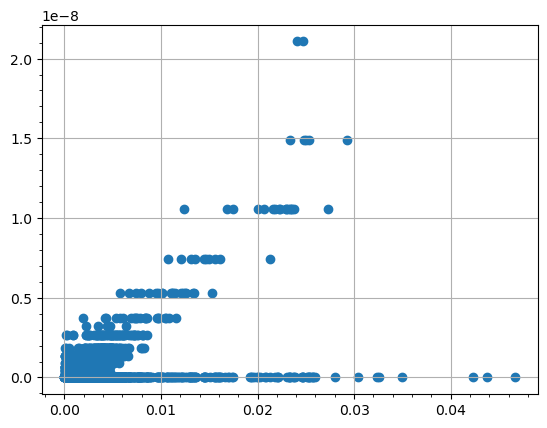

In [19]:
plt.scatter(pca.distance_line(X2_0, a2_0), pca.distance_line(X2, a2))
plt.minorticks_on()
plt.grid(1)
plt.show()

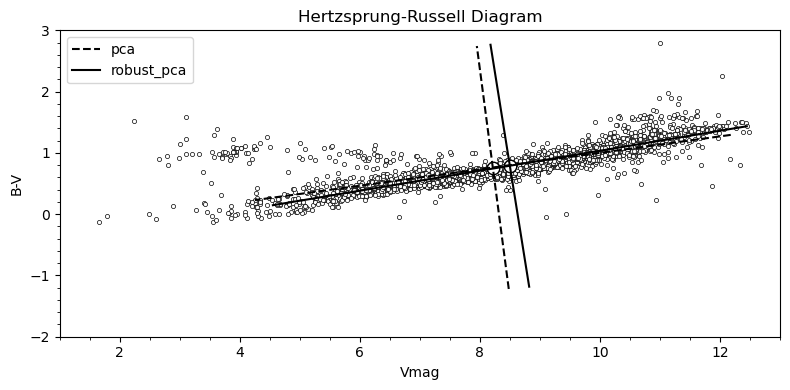

In [20]:
plt.figure(figsize=(8,4))
plt.scatter(Vmag, B_V, s=9, c='w', edgecolors='k', linewidth=0.5)
plt.scatter([sk_c0[0]], [sk_c0[1]], s=81, c='w', edgecolors='k')
plt.scatter([c[0]], c[[1]], s=81, c='w', edgecolors='k')
plt.plot([sk_c0[0]-4*sk_a1[0], sk_c0[0]+4*sk_a1[0]], [sk_c0[1]-4*sk_a1[1], sk_c0[1]+4*sk_a1[1]], 
         label='pca', linestyle='--', c='k')
plt.plot([sk_c0[0]-2*sk_a2[0], sk_c0[0]+2*sk_a2[0]], [sk_c0[1]-2*sk_a2[1], sk_c0[1]+2*sk_a2[1]],
        linestyle='--', c='k')
plt.plot([c[0]-4*a1[0], c[0]+4*a1[0]], [c[1]-4*a1[1], c[1]+4*a1[1]], 
         label='robust_pca', linestyle='-', c='k')
plt.plot([c[0]-2*a2[0], c[0]+2*a2[0]], [c[1]-2*a2[1], c[1]+2*a2[1]],
        linestyle='-', c='k')
plt.xlabel('Vmag')
plt.ylabel('B-V')
plt.title('Hertzsprung-Russell Diagram')
plt.minorticks_on()
plt.xlim(1,13)
plt.ylim(-2,3)
plt.legend()
plt.tight_layout()
# plt.savefig('fig/robust_pca_HIP_star.eps')
plt.show()

In [21]:
from mlgrad.pca.location_scatter import robust_location_scatter

In [22]:
wma = af.averaging_function("WM", rhofunc=funcs.Quantile_Sqrt(0.95, 0.001))
c, S = pca.robust_location_scatter(X0, wma)
print(S)

[[ 1.772 -8.367]
 [-8.367 48.282]]


In [23]:
L, A = np.linalg.eig(S)
print(A, L)
np.dot(A[0], A[1])

[[-0.985  0.172]
 [-0.172 -0.985]] [ 0.313 49.742]


np.float64(0.0)

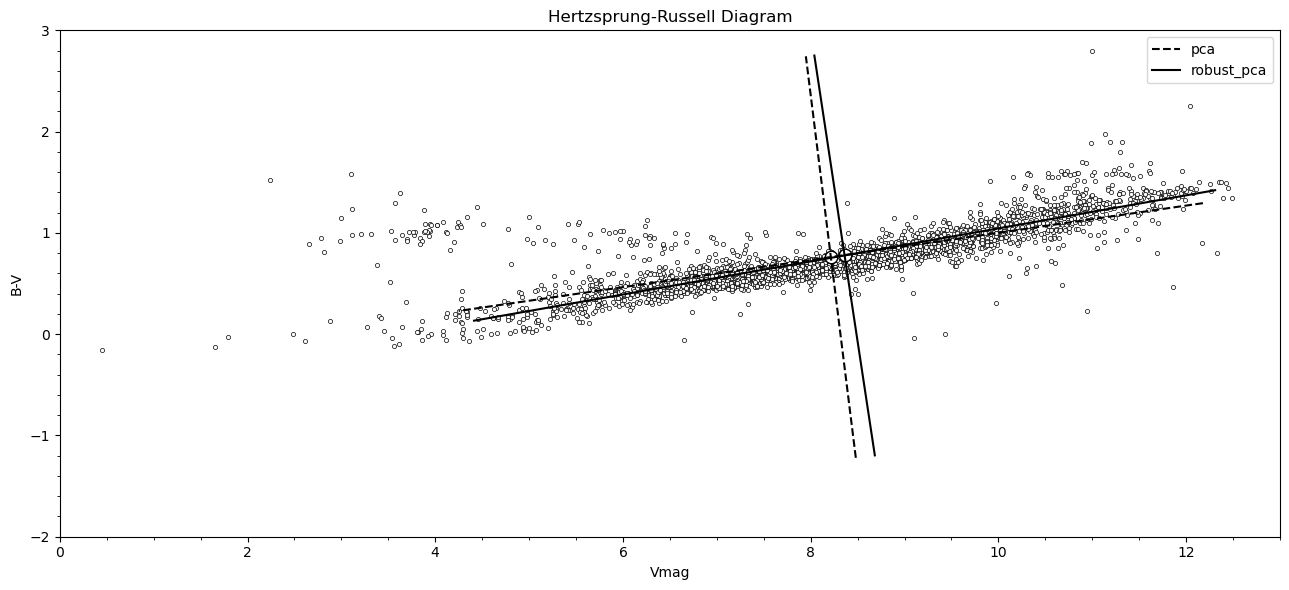

In [24]:
plt.figure(figsize=(13,6))
plt.scatter(Vmag, B_V, s=9, c='w', edgecolors='k', linewidth=0.5)
plt.scatter([sk_c0[0]], [sk_c0[1]], s=81, c='w', edgecolors='k')
plt.scatter([c[0]], c[[1]], s=81, c='w', edgecolors='k')
plt.plot([sk_c0[0]-4*sk_a1[0], sk_c0[0]+4*sk_a1[0]], [sk_c0[1]-4*sk_a1[1], sk_c0[1]+4*sk_a1[1]], 
         label='pca', linestyle='--', c='k')
plt.plot([sk_c0[0]-2*sk_a2[0], sk_c0[0]+2*sk_a2[0]], [sk_c0[1]-2*sk_a2[1], sk_c0[1]+2*sk_a2[1]],
        linestyle='--', c='k')
plt.plot([c[0]-4*a1[0], c[0]+4*a1[0]], [c[1]-4*a1[1], c[1]+4*a1[1]], 
         label='robust_pca', linestyle='-', c='k')
plt.plot([c[0]-2*a2[0], c[0]+2*a2[0]], [c[1]-2*a2[1], c[1]+2*a2[1]],
        linestyle='-', c='k')
# plt.plot([c[0]+4*A[0,0], c[0], c[0]+2*A[0,1]], [c[1]+4*A[1,0], c[1], c[1]+2*A[1,1]], 
#          c='k', linestyle=':', label='robust pca II')
plt.legend()
plt.xlabel('Vmag')
plt.ylabel('B-V')
plt.title('Hertzsprung-Russell Diagram')
plt.minorticks_on()
plt.xlim(0,13)
plt.ylim(-2,3)
plt.tight_layout()
# plt.savefig('fig/robust_pca_HIP_star_1.eps')
plt.show()